### RSI

To understand the RSI mathematically, don't think of it as a complex formula. Instead, think of it as a **tug-of-war** between "Up Days" and "Down Days."

The RSI is designed to answer one question: **"In the last 14 days, what percentage of the total price movement was upward?"**

---

### Step 1: The Raw Inputs (Gains vs. Losses)

First, we look at the daily changes over a specific window (standard is 14 days).1

- **Average Gain:** The average of all price increases during those 14 days.
    
- **Average Loss:** The average of all price decreases (as a positive number) during those 14 days.2
    

### Step 2: The Relative Strength ($RS$)

We calculate the ratio of gains to losses. This is the "Relative Strength."

$$RS = \frac{\text{Average Gain}}{\text{Average Loss}}$$

- If the $RS$ is **high** (e.g., 5), it means the stock is moving up 5 times more than it is moving down.
    
- If the $RS$ is **low** (e.g., 0.2), it means the stock is moving down 5 times more than it is moving up.
    

### Step 3: The RSI Formula (The 0-100 Scale)

To make this useful, we "squish" that $RS$ value into a scale of 0 to 100.

$$RSI = 100 - \left( \frac{100}{1 + RS} \right)$$

---

### What the values mean in plain English:

| **RSI Value** | **What is happening mathematically?**                             | **Market Sentiment**            |
| ------------- | ----------------------------------------------------------------- | ------------------------------- |
| ~100          | The $RS$ is huge. Almost all movement in the last 14 days was UP. | **Overbought** (Vertical climb) |
| **50**        | $RS$ is 1. The average gain equals the average loss.              | **Neutral** (Sideways)          |
| ~ 0           | The $RS$ is near zero. Almost all movement was DOWN.              | **Oversold** (Panic selling)    |


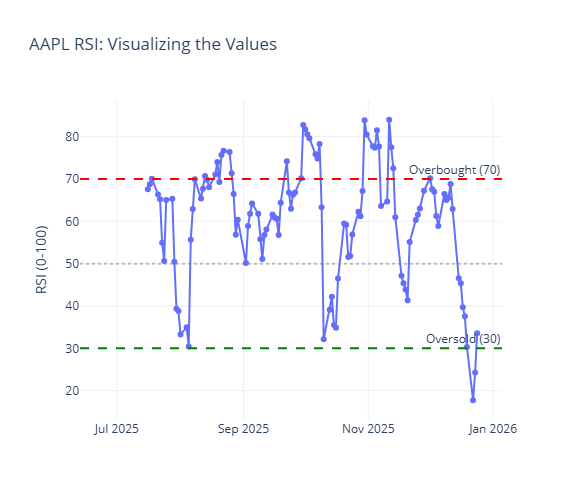

In [31]:
import vectorbt as vbt
import plotly.graph_objects as go

# 1. Calculate RSI
price = vbt.YFData.download('AAPL', period='6mo').get('Close')
rsi_obj = vbt.RSI.run(price, window=14)
rsi_values = rsi_obj.rsi

# 2. Create the Figure
fig = go.Figure()

# 3. Add the RSI line with dots (markers) so you can see each "Number"
fig.add_trace(go.Scatter(
    x=rsi_values.index, 
    y=rsi_values, 
    mode='lines+markers', # This shows the line AND the individual data points
    name='RSI Value',
    marker=dict(size=6)
))

# 4. Add the standard RSI boundaries
fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Overbought (70)")
fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Oversold (30)")

# 5. Add a 50 line (The "Balance" point)
fig.add_hline(y=50, line_dash="dot", line_color="gray", opacity=0.5)

fig.update_layout(
    title="AAPL RSI: Visualizing the Values",
    yaxis_title="RSI (0-100)",
    template="plotly_white",
    height=500
)

fig.show()


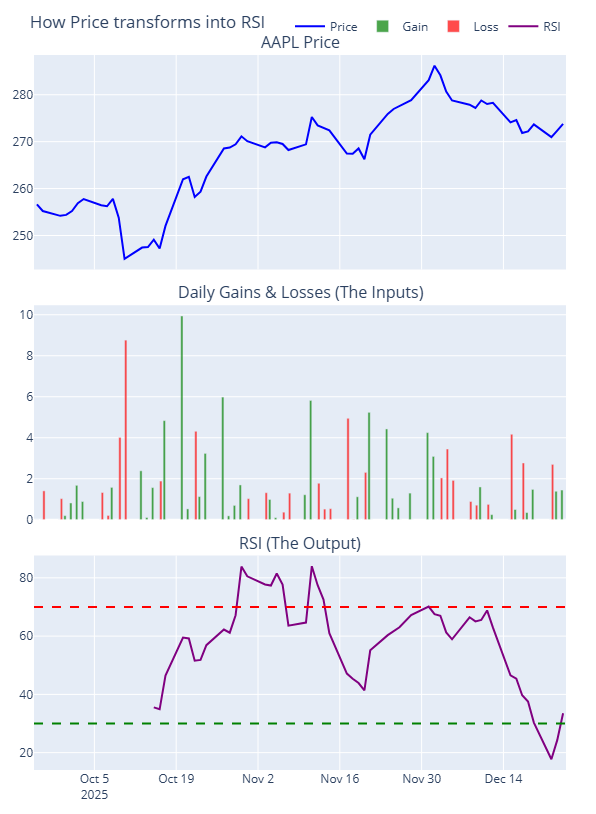

In [32]:
import vectorbt as vbt
import plotly.graph_objects as go
import pandas as pd

# 1. Prepare the Data
data = vbt.YFData.download('AAPL', period='3mo')
price = data.get('Close')

# Calculate the "Ingredients"
change = price.diff()
gain = change.where(change > 0, 0)
loss = -change.where(change < 0, 0)
rsi = vbt.RSI.run(price, window=14).rsi

# 2. Create Subplots
fig = vbt.make_subplots(rows=3, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.05,
                        subplot_titles=("AAPL Price", "Daily Gains & Losses (The Inputs)", "RSI (The Output)"))

# Row 1: Price
fig.add_trace(go.Scatter(x=price.index, y=price, name='Price', line=dict(color='blue')), row=1, col=1)

# Row 2: Gains and Losses (Bar chart shows the 'tug-of-war')
fig.add_trace(go.Bar(x=gain.index, y=gain, name='Gain', marker_color='green', opacity=0.7), row=2, col=1)
fig.add_trace(go.Bar(x=loss.index, y=loss, name='Loss', marker_color='red', opacity=0.7), row=2, col=1)

# Row 3: RSI
fig.add_trace(go.Scatter(x=rsi.index, y=rsi, name='RSI', line=dict(color='purple')), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

fig.update_layout(height=800, title_text="How Price transforms into RSI", showlegend=True)
fig.show()

#### **Step 1: The Price (Top)**

This is the raw market data. You see the peaks and valleys.

#### **Step 2: Gains & Losses (Middle)**

This is the **Mathematical Engine**.

- Every time there is a tall **green bar**, the RSI is pushed **UP**.
    
- Every time there is a tall **red bar**, the RSI is pulled **DOWN**.
    
- If you see many green bars in a row, the RSI will climb toward 70.
    

#### **Step 3: The RSI (Bottom)**

This is the **Normalized Result**. Notice that even if the stock price goes from $180 to $250, the RSI stays trapped between 0 and 100. It turns absolute dollar moves into a "percentage of strength."

### A Quick Observation

Look at a day where there is a **huge red bar** in the middle chart.

- Did the RSI drop sharply on that same day?
    
- Now look at a period of tiny, mixed bars. The RSI should be floating near 50 (neutral).

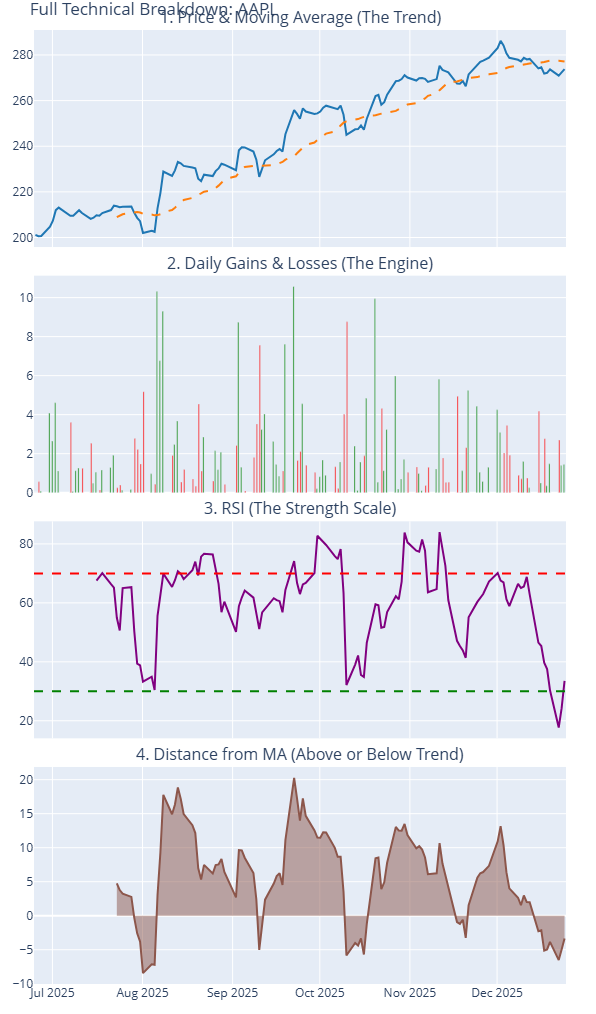

In [33]:
import vectorbt as vbt
import plotly.graph_objects as go

# 1. Prepare all the data points
data = vbt.YFData.download('AAPL', period='6mo')
price = data.get('Close')
ma20 = vbt.MA.run(price, window=20).ma
rsi = vbt.RSI.run(price, window=14).rsi
change = price.diff()
gain = change.where(change > 0, 0)
loss = -change.where(change < 0, 0)

# 2. Create 4 Rows
fig = vbt.make_subplots(rows=4, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.03,
                        subplot_titles=("1. Price & Moving Average (The Trend)", 
                                        "2. Daily Gains & Losses (The Engine)", 
                                        "3. RSI (The Strength Scale)",
                                        "4. Distance from MA (Above or Below Trend)"))

# Row 1: Price and MA
fig.add_trace(go.Scatter(x=price.index, y=price, name='Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=ma20.index, y=ma20, name='20-day MA', line=dict(dash='dash')), row=1, col=1)

# Row 2: Gains & Losses
fig.add_trace(go.Bar(x=gain.index, y=gain, name='Gain', marker_color='green'), row=2, col=1)
fig.add_trace(go.Bar(x=loss.index, y=loss, name='Loss', marker_color='red'), row=2, col=1)

# Row 3: RSI
fig.add_trace(go.Scatter(x=rsi.index, y=rsi, name='RSI', line=dict(color='purple')), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

# Row 4: Distance from MA (Price minus MA)
ma_diff = price - ma20
fig.add_trace(go.Scatter(x=ma_diff.index, y=ma_diff, name='Price - MA', fill='tozeroy'), row=4, col=1)

fig.update_layout(height=1000, title_text="Full Technical Breakdown: AAPL", showlegend=False)
fig.show()

## Pillar 1: The Data (The "Where")
Everything starts with a Series of numbers. We use yfinance through VectorBT to get the Closing Price.

The Point: VectorBT treats this like a simple list of numbers, but it remembers the dates.

In [2]:
import vectorbt as vbt

# Get 6 months of Apple stock prices
price = vbt.YFData.download('AAPL', period='6mo').get('Close')

print(price.head()) # Look at the first 5 rows

Date
2025-06-25 04:00:00+00:00    201.136536
2025-06-26 04:00:00+00:00    200.577698
2025-06-27 04:00:00+00:00    200.657532
2025-06-30 04:00:00+00:00    204.738937
2025-07-01 04:00:00+00:00    207.383377
Name: Close, dtype: float64


### Pillar 2: The Signal (The "When")

This is where most people get stuck. A "Signal" in VectorBT is just a list of **True** and **False**.

- **True** = Do something (Buy or Sell).
    
- **False** = Do nothing.
    

Let's create a signal based on a **Moving Average (MA)**. If the price is higher than the average of the last 20 days, we want to be "In" the market.

In [4]:
# 1. Calculate the average
ma20 = vbt.MA.run(price, window=20).ma

# 2. Create the "Entry" signal (True when price is above average)
entries = price > ma20

# 3. Create the "Exit" signal (True when price falls below average)
exits = price < ma20

print(entries.tail(100)) # You will see a column of True/False

Date
2025-08-05 04:00:00+00:00    False
2025-08-06 04:00:00+00:00     True
2025-08-07 04:00:00+00:00     True
2025-08-08 04:00:00+00:00     True
2025-08-11 04:00:00+00:00     True
                             ...  
2025-12-18 05:00:00+00:00    False
2025-12-19 05:00:00+00:00    False
2025-12-22 05:00:00+00:00    False
2025-12-23 05:00:00+00:00    False
2025-12-24 05:00:00+00:00    False
Length: 100, dtype: bool


### Pillar 3: The Portfolio (The "How Much")

Now we give the **Price**, the **Entries**, and the **Exits** to the Portfolio engine. It acts like a robot trader:

1. It sees a `True` in `entries` -> It buys $10,000 worth.
    
2. It sees a `True` in `exits` -> It sells everything.
    
3. It repeats this until the end of the 6 months.

In [5]:
# Run the simulation
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=10000)

# See the final result
print(pf.total_return())

0.13448199192362773


### Let's Recap the Flow

|**Step**|**Code Concept**|**Real-World Meaning**|
|---|---|---|
|**1. Data**|`price`|The history of what happened.|
|**2. Logic**|`price > ma20`|The "Rule" you want to follow.|
|**3. Result**|`pf.stats()`|The scorecard of how that rule performed.|


In [8]:
print(pf.stats())

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2025-06-25 04:00:00+00:00
End                           2025-12-24 05:00:00+00:00
Period                                              128
Start Value                                     10000.0
End Value                                  11344.819919
Total Return [%]                              13.448199
Benchmark Return [%]                          36.131408
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                                6.32982
Max Drawdown Duration                              36.0
Total Trades                                          5
Total Closed Trades                                   5
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                       80.0
Best Trade [%]                                 6.470047
Worst Trade [%]                               -1

This table is your **Strategy Report Card**. It tells you how your "Rule" (the Moving Average or RSI) would have performed if it were trading real money.

Let’s break down the most important numbers into three "buckets":

### 1. The Bottom Line (Money)

- **Total Return [13.44%]**: You turned $10,000 into **$11,344**. You made a profit!
    
- **Benchmark Return [36.13%]**: This is the "Buy & Hold" score. If you had just bought AAPL on day one and did nothing, you would have made **36%**.
    
    - _Insight:_ Your strategy made money, but it was "lazier" than the market. You missed out on some of the big climb.
        

### 2. The Risk (The "Scare" Factor)

- **Max Drawdown [6.32%]**: This is the most important risk metric. It means at your worst point, your account dropped **6.32%** from its previous peak.
    
    - _Insight:_ This is a very "safe" score. While the benchmark (AAPL) might have crashed 20% at some point, your strategy kept your losses small.
        
- **Max Drawdown Duration [36.0]**: It took 36 days to recover from your biggest loss and hit a new high.
    

### 3. The Trade Mechanics (The "How")

|**Term**|**Value**|**What it means**|
|---|---|---|
|**Total Closed Trades**|5|You entered and exited 5 times during the 6 months.|
|**Win Rate**|80%|4 trades were profitable; 1 trade was a loss.|
|**Best / Worst Trade**|6.4% / -1.3%|Your biggest win was much larger than your biggest loss. This is great!|
|**Avg Winning Duration**|19.75|Your winning trades lasted about 20 days.|
|**Profit Factor**|10.99|For every $1 you lost, you made $10.99. Anything above 2.0 is usually considered excellent.|

---

### The Summary: Is this a "Good" strategy?

**Yes and No.**

- **Yes:** It is very consistent (80% win rate) and keeps losses very small (only 1.3%). It is a "low stress" strategy.
    
- **No:** You underperformed the benchmark by a lot (13% vs 36%). You spent a lot of time "out of the market" in cash while AAPL was zooming up.

Now that you know how to read the report card, let's look at **how to combine two rules**.

Remember how we said **Entries** are just a list of `True/False`? If you have:

1. `Rule_A` (Price > MA) -> `[True, True, False...]`
    
2. `Rule_B` (RSI < 30) -> `[False, True, False...]`

    

You can combine them with the `&` symbol: `final_entries = Rule_A & Rule_B` _(This only buys if BOTH are True at the same time)_.

### Step 1: Create the Two Rules

We'll define a "Trend" rule and a "Momentum" rule.

In [20]:
ma20 = vbt.MA.run(price, window=20).ma
rsi = vbt.RSI.run(price, window=20).rsi


# Rule 1: Is the trend up? (Price above Moving Average)
trend_up = price > ma20

# Rule 2: Is it a good deal? (RSI below 30)
is_oversold = rsi < 50

### Step 2: Combine them (The "And" Logic)

We want to buy **only** when both are `True`. VectorBT uses the `&` symbol for this.

In [21]:
# This creates a NEW list of True/False
# It is only True if Trend is Up AND Price is Oversold
combined_entries = trend_up & is_oversold

# We still need an exit! Let's just sell when RSI is high
combined_exits = rsi > 80

### Step 3: Run the "New" Strategy

Now we pass these combined rules into the portfolio engine.

In [22]:
# Clean up the NaNs first as we learned
entries = combined_entries.fillna(False).astype(bool)
exits = combined_exits.fillna(False).astype(bool)

pf_combined = vbt.Portfolio.from_signals(price, entries, exits, init_cash=10000)

print(pf_combined.stats())

Start                         2025-06-25 04:00:00+00:00
End                           2025-12-24 05:00:00+00:00
Period                                              128
Start Value                                     10000.0
End Value                                       10000.0
Total Return [%]                                    0.0
Benchmark Return [%]                          36.131408
Max Gross Exposure [%]                              0.0
Total Fees Paid                                     0.0
Max Drawdown [%]                                    NaN
Max Drawdown Duration                               NaN
Total Trades                                          0
Total Closed Trades                                   0
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                        NaN
Best Trade [%]                                      NaN
Worst Trade [%]                                 

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



### Why we do this (The Strategy Theory)

Think of it like a checklist for buying a car:

1. **Rule A:** Is it a brand I like? (MA Trend)
    
2. **Rule B:** Is it on sale? (RSI Oversold)
    

If you only use **Rule B**, you might buy a total "lemon" just because it's cheap. By adding **Rule A**, you ensure you are only buying "good" stocks that happen to be on sale today.

### What to look for in the Stats:

Check your **Win Rate** and **Profit Factor** compared to the previous report card. Usually, adding a second rule makes you trade **less often**, but your trades become **higher quality**.

**How many trades did the "Combined" version take compared to the 5 trades in your previous report card?** (Check the `Total Closed Trades` row in the new stats).

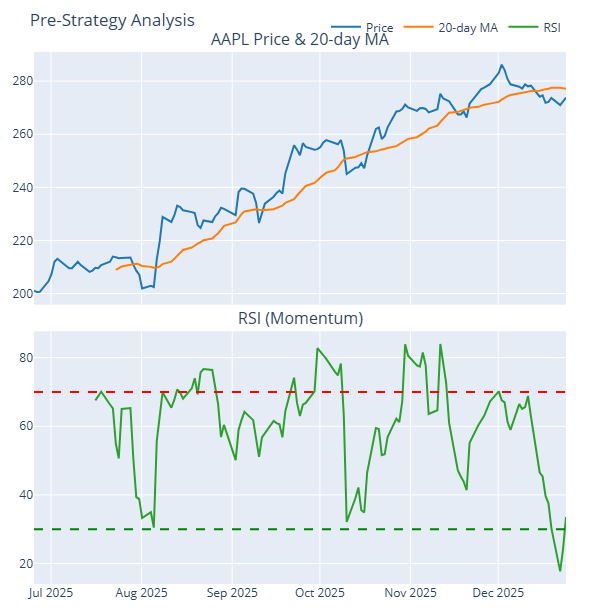

In [23]:
import vectorbt as vbt
import plotly.graph_objects as go

# 1. Download AAPL data
data = vbt.YFData.download('AAPL', period='6mo')
price = data.get('Close')

# 2. Calculate technicals
ma20 = vbt.MA.run(price, window=20).ma
rsi = vbt.RSI.run(price, window=14).rsi

# 3. Create the multi-panel visual
fig = vbt.make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.05,
                        subplot_titles=("AAPL Price & 20-day MA", "RSI (Momentum)"))

# Top panel: Price and MA
fig.add_trace(go.Scatter(x=price.index, y=price, name='Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=ma20.index, y=ma20, name='20-day MA'), row=1, col=1)

# Bottom panel: RSI with threshold lines
fig.add_trace(go.Scatter(x=rsi.index, y=rsi, name='RSI'), row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1)

fig.update_layout(height=600, title_text="Pre-Strategy Analysis", showlegend=True)
fig.show()

### Visualizing Before the Strategy

Before we finalize the rules, let's look at the data. Visualizing the Price, Moving Average, and RSI together helps you see how they interact.

When you see the chart below:

1. **Trend Confirmation:** Look at the top chart. When the blue line (Price) is consistently above the orange line (MA), the stock is in an "uptrend."
    
2. **The "Dip":** Look at the bottom chart. When the purple line (RSI) touches the green dashed line (30), that’s a "dip."
    
3. **The Buy Signal:** Our strategy triggers only when a dip happens _while_ the trend is still up.


### Observation:

Look at the most recent dates on the chart.

- Is the price currently above or below the 20-day MA?
    
- Is the RSI closer to 30 (Buy zone) or 70 (Sell zone)?
    

**Based on what you see in the chart, would you like to keep the "Buy at RSI < 30" rule, or do you think we should make it more sensitive (e.g., Buy at RSI < 40)?**

In [ ]:
ddd